# **ASSIGNMENT 3**

In [31]:
import numpy as np
import pandas as pd

# For encoding categorical labels
from sklearn.preprocessing import LabelEncoder

# For splitting dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score  # ❌ NOT REQUIRED (not used)

# Regression models
from sklearn.linear_model import LinearRegression   # ❌ NOT REQUIRED (not used)
from sklearn.linear_model import LogisticRegression

# Evaluation metric
from sklearn.metrics import r2_score                # ❌ NOT IDEAL for classification

# Data transformation
from sklearn.preprocessing import PowerTransformer  # ❌ NOT REQUIRED (not used)

# Some imported libraries were not used in the experiment and hence are not required.


In [32]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Feature matrix
X = iris.data

# Target labels (already numeric: 0,1,2)
y = iris.target

In [33]:
# Create DataFrame from sklearn dataset
df = pd.DataFrame(data=iris.data,columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])

# Add target column
df['Species'] = iris.target
df


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
# Label Encoding (❌ NOT REQUIRED but done for lab formality)

encoder = LabelEncoder()

# Convert numeric target to species names
Label = iris.target_names[iris.target]

# Encode back to numeric labels
y = encoder.fit_transform(Label)
y

# Label encoding is not strictly required because Iris target labels are already numeric. This step is included for demonstration purposes only.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=105)

In [36]:
# Train Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict class labels
y_pred = lr.predict(X_test)

In [37]:
# Model Evaluation (❌ r2_score not suitable)

print(r2_score(y_test, y_pred))

# r2_score is mainly used for regression problems and is not an ideal metric for classification tasks.

0.9687695190505934


In [38]:
# Confusion Matrix and Accuracy

from sklearn.metrics import (precision_score,confusion_matrix,accuracy_score,recall_score,roc_auc_score,roc_curve,auc)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Confusion matrix helps in understanding correct and incorrect classifications.

[[13  0  0]
 [ 0 16  1]
 [ 0  0 20]]


In [39]:
# ROC helper function (❌ NOT USED later)

import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
  fpr, tpr, thresholds = roc_curve(true_y, y_prob)
  plt.plot(fpr, tpr)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")

# This function is defined for binary ROC plotting but is not used because Iris is a multi-class dataset.

In [40]:
# y_pred contains the predicted class labels generated by the trained Logistic Regression model
y_pred

# It stores the model’s predictions for the test dataset.

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2])

In [41]:
# y_test contains the actual (true) class labels of the test dataset
y_test

# It represents the ground truth values used to evaluate the model.

array([2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2])

In [42]:
# Multi-Class ROC Preparation

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Convert labels to binary format (One-Vs-Rest)
# Binarize the labels for multi-class classification
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = 3

In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=42)

# ROC analysis requires binarized labels, so a separate split is performed.

In [44]:
# Train One-Vs-Rest Logistic Regression
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [45]:
# Compute ROC & AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

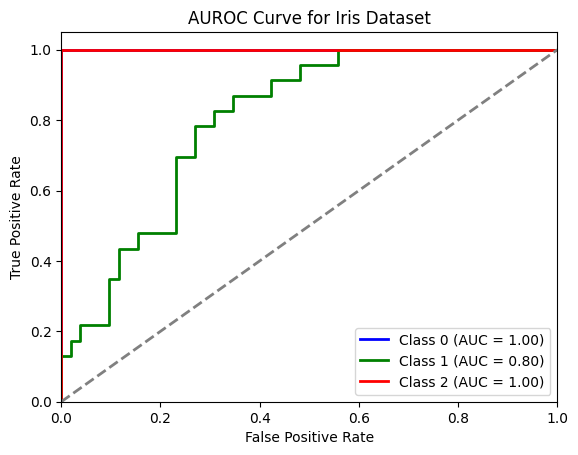

In [46]:
# Plot Multi-Class ROC Curve
plt.figure()
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve for Iris Dataset')
plt.legend(loc="lower right")
plt.show()